Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

**Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.**

**Q2. Split the dataset into a training set (70%) and a test set (30%).**

**Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.**

**Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.**

**Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.**

**Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.**

**Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.**

**Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Load the dataset
df = pd.read_csv('/content/dataset.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# check missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a random forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [7]:
# Evaluate the performance of the model on the test set
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


In [8]:
# Use feature importance scores to identify top 5 most important features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_5_features = X.columns[indices][:5]

In [13]:
print(top_5_features)

Index(['ca', 'cp', 'thalach', 'oldpeak', 'thal'], dtype='object')


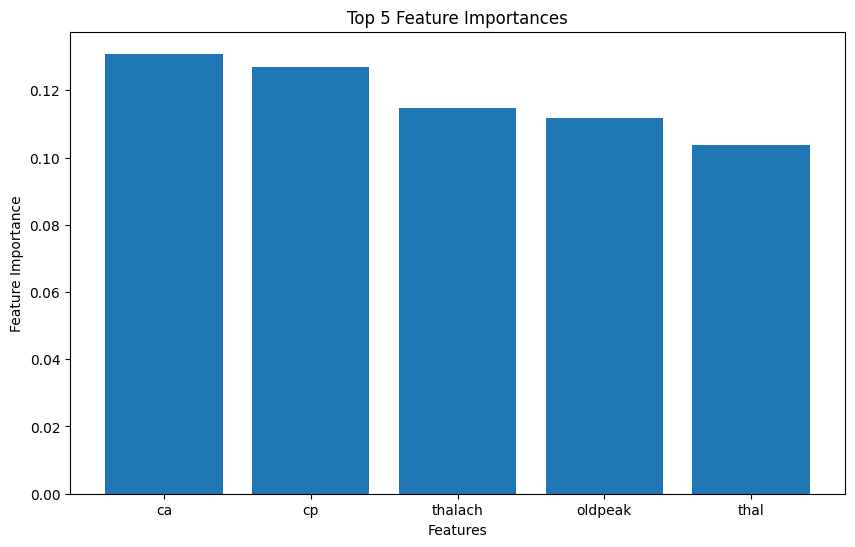

In [29]:
# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_features, importances[indices][:5])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 5 Feature Importances')
plt.show()

In [38]:
# Tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]})

In [39]:
# Report best set of hyperparameters and performance metrics
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
best_y_pred = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred)
best_f1score = f1_score(y_test, best_y_pred)

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Best Precision:", best_precision)
print("Best Recall:", best_recall)
print("Best F1 Score:", best_f1score)

# Compare the performance of the tuned model with the default model
print("Default Model Accuracy:", accuracy)
print("Tuned Model Accuracy:", best_accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8351648351648352
Best Precision: 0.8301886792452831
Best Recall: 0.88
Best F1 Score: 0.8543689320388349
Default Model Accuracy: 0.8131868131868132
Tuned Model Accuracy: 0.8351648351648352


In [42]:
# Create a random forest classifier with the best hyperparameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

The decision boundaries plotted above show how the random forest classifier separates the data points of two of the most important features based on their predicted class labels. This can provide insights into how the model makes predictions and identify regions where the model may perform well or poorly.

However, it's important to note that decision boundaries can be influenced by the specific dataset used for training and may not generalize well to new, unseen data. The model's performance may also be impacted by the choice of hyperparameters and the quality of the data used for training. It's crucial to evaluate the model's performance on multiple metrics and validate it on different datasets to get a more comprehensive understanding of its strengths and limitations in predicting heart disease risk. Additionally, interpreting decision boundaries may be challenging in high-dimensional datasets, as it's not possible to visualize all the features simultaneously. In such cases, other techniques such as feature selection or dimensionality reduction may be helpful.